In [1]:
from scipy import io as sio
import tensorflow as tf
import numpy as np


from scipy import io as sio
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU




import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#step 1 loading and preprocessing EMNIST dataset 

mat = sio.loadmat('emnist-balanced.mat')
data = mat['dataset']



# this type of sample did not work as the other way of splitting so I pass for now 
#x_train, x_test, y_train, y_test = train_test_split(data['train'][0,0]['images'][0,0],
                                                  #  data['train'][0,0]['images'][0,0],
                                                   # test_size=0.2)
                                                    



#define what the training and testing data are

x_train = data['train'][0,0]['images'][0,0] 
y_train = data['train'][0,0]['labels'][0,0]
x_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

#I did not use cross-validation by now since it was not that inportant in this case
#_train = data['test'][0,0]['labels'][0,0]
#using cros validation 
#al_start = x_train.shape[0] - x_test.shape[0]
#_val =x_train[val_start:x_train.shape[0]]
#_val = y_train[val_start:y_train.shape[0]]
#_train = x_train[0:val_start]
#_train = y_train[0:val_start]


#reshape the arrays into image

x_train = x_train.reshape( (x_train.shape[0], 28, 28), order='F')


    
    
    
  
    
#_train.shape, y_train.shape

#_test.shape, y_test.shape


#_train = x_train[..., tf.newaxis]
#_test = x_test[..., tf.newaxis]

#_train.shape

#_test.shape

#p.min(x_train), np.max(x_train)

#x_train = x_train / 255.
#x_test=x_test/255

#p.min(x_train), np.max(x_train)
#x_train = x_train.reshape( (x_train.shape[0], 28, 28), order='F')

#y_train = y_train.reshape( (y_train.shape[0], 28, 28), order='F')'''
x_test = x_test.reshape( (x_test.shape[0], 28, 28), order='F')


#number of unique classes
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


#reshaping the training and testing data


print('train shape', x_train.shape)
print('test shape', x_test.shape)




Using TensorFlow backend.


Total number of outputs :  47
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
train shape (112800, 28, 28)
test shape (18800, 28, 28)


Text(0.5, 1.0, 'Ground Truth : [41]')

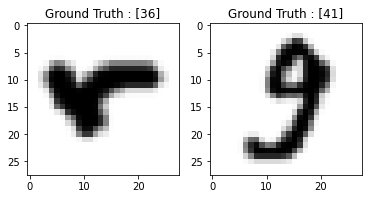

In [2]:

# Display the image in training data 
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='binary')
plt.title("Ground Truth : {}".format(y_train[1]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(x_test[0,:], cmap='binary')
plt.title("Ground Truth : {}".format(y_test[0]))


In [3]:
#reshaping the training and testing data
x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape, y_train.shape

((112800, 28, 28, 1), (18800, 28, 28, 1), (112800, 1))

In [4]:
#converting the data from int8 to float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.





In [5]:
#need to convert the class label data in one encoding vector.
#So let's convert the training and testing labels into one-hot encoding vectors

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[3])
print('After conversion to one-hot:', y_train_one_hot[0])

#from sklearn.model_selection import train_test_split
#x_train,valid_X,train_label,valid_label=train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=13)

#x_train.shape,valid_X.shape,train_label.shape,valid_label.shape


from sklearn.model_selection import train_test_split
x_train, valid_X, train_label, valid_label = train_test_split(x_train, y_train_one_hot, test_size=0.1)

x_train.shape, valid_X.shape, train_label.shape, valid_label.shape

Original label: [15]
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


((101520, 28, 28, 1), (11280, 28, 28, 1), (101520, 47), (11280, 47))

In [6]:
batch_size = 500
epochs = 17
num_classes = 47



In [ ]:
#built the model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


model.summary()

'''Let's visualize the layers that you created in the above step by using the summary function. 
This will show some parameters (weights and biases) in each layer and also the total parameters in your model'''

#train the model/fiting 
#fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

model_train = model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs, verbose =1, validation_data=(valid_X,valid_label)) 
#no validation set needed for now validation_data=(valid_X, valid_label))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)        

In [11]:
#test evaluation
test_eval = model.evaluate(x_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])




Test loss: 0.7484878813776564
Test accuracy: 0.8702127933502197


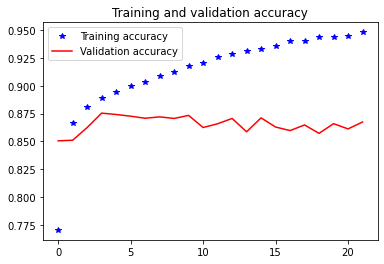

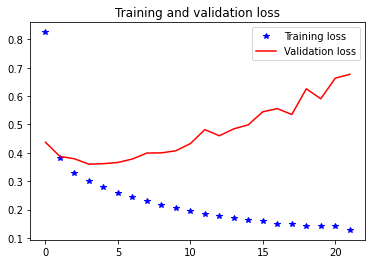

In [26]:
#now we analyse our model and see what can be done to make it better

accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b*', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b*', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [13]:
#dropout
batch_size = 64
epochs = 22
num_classes = 47


In [14]:
#CNN with the drop out layer


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model_train_dropout = model.fit(x_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


'''We add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount.
How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly.
This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.'''

Train on 101520 samples, validate on 11280 samples
Epoch 1/22
101520/101520 [==============================] - 158s 2ms/step - loss: 0.9509 - accuracy: 0.7082 - val_loss: 0.4020 - val_accuracy: 0.8645
Epoch 2/22
101520/101520 [==============================] - 157s 2ms/step - loss: 0.5118 - accuracy: 0.8254 - val_loss: 0.3682 - val_accuracy: 0.8678
Epoch 3/22
101520/101520 [==============================] - 157s 2ms/step - loss: 0.4546 - accuracy: 0.8428 - val_loss: 0.3370 - val_accuracy: 0.8788
Epoch 4/22
101520/101520 [==============================] - 157s 2ms/step - loss: 0.4260 - accuracy: 0.8498 - val_loss: 0.3307 - val_accuracy: 0.8823
Epoch 5/22
101520/101520 [==============================] - 157s 2ms/step - loss: 0.4038 - accuracy: 0.8574 - val_loss: 0.3204 - val_accuracy: 0.8812
Epoch 6/22
101520/101520 [==============================] - 158s 2ms/step - loss: 0.3920 - accuracy: 0.8598 - val_loss: 0.3188 - val_accuracy: 0.8830
Epoch 7/22
101520/101520 [=======================

'We add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount.\nHow many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly.\nThis way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.'

In [2]:
#model summary 
model.summary()


NameError: name 'model' is not defined

In [1]:


#now we analyse our model and see what can be done to make it better

accuracy = model_train_dropout.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train_dropout.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b+', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b+', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




#save the model to use for testing





NameError: name 'model_train_dropout' is not defined

In [16]:
model.save("epic_hand_read.model")


In [19]:
new_model = tf.keras.models.load_model("epic_hand_read.model")

In [20]:
prediktions = new_model.predict(x_test)
print(prediktions)


[[1.70426517e-06 3.79539642e-07 5.43627038e-07 ... 2.57238988e-02
  3.81491019e-12 3.31958105e-09]
 [8.37570369e-08 1.75841364e-09 1.56653901e-09 ... 5.37748861e-07
  1.37205864e-08 7.86515898e-07]
 [2.90010908e-13 1.53492098e-11 1.45744701e-12 ... 2.21640617e-01
  9.78978181e-17 4.86167842e-14]
 ...
 [9.78056214e-09 6.39668167e-01 2.07923456e-09 ... 2.18087468e-08
  8.75075372e-08 9.24861240e-07]
 [1.31301988e-07 2.18312252e-13 4.07814405e-05 ... 8.08790512e-03
  9.94509364e-09 2.37230418e-12]
 [8.84998672e-11 4.07103462e-09 1.30762032e-08 ... 2.05679498e-06
  2.01800503e-05 8.38953440e-08]]


In [21]:
print(np.argmax(prediktions[6452]))



33


In [22]:
test_eval = model.evaluate(x_test, y_test_one_hot, verbose=1)

18800/18800 [==============================] - 7s 392us/step


In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3084646105576069
Test accuracy: 0.8912765979766846


In [24]:
predicted_classes = model.predict(x_test)


In [27]:
#need to use argmax function to find the one prediction with the highest probability
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


AxisError: axis 1 is out of bounds for array of dimension 1

In [28]:
predicted_classes.shape, y_test.shape

((18800,), (18800, 1))

Found 400 correct labels


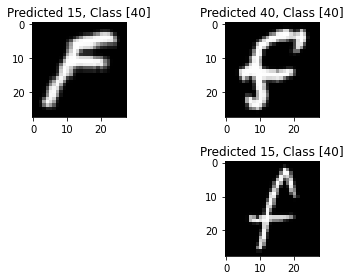

In [33]:
correct = np.where(predicted_classes[3422]==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()
    

Found 18400 incorrect labels


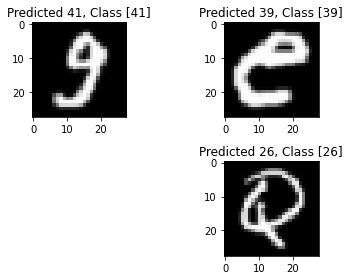

In [34]:
#now for the incorrect ones
incorrect = np.where(predicted_classes[3422]!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()
    



In [32]:
'''Classification report will help us in identifying the misclassified classes in more detail.
You will be able to observe for which class the model performed bad out of the given 26 classes'''


from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.30      0.81      0.44       400
     Class 1       0.54      0.64      0.59       400
     Class 2       0.92      0.90      0.91       400
     Class 3       0.99      0.99      0.99       400
     Class 4       0.95      0.93      0.94       400
     Class 5       0.96      0.93      0.94       400
     Class 6       0.95      0.95      0.95       400
     Class 7       0.98      0.98      0.98       400
     Class 8       0.96      0.96      0.96       400
     Class 9       0.70      0.78      0.74       400
    Class 10       0.98      0.98      0.98       400
    Class 11       0.98      0.97      0.98       400
    Class 12       0.95      0.97      0.96       400
    Class 13       0.94      0.91      0.92       400
    Class 14       0.98      0.98      0.98       400
    Class 15       0.70      0.62      0.66       400
    Class 16       0.95      0.94      0.95       400
    Class 17       0.97    